<a href="https://colab.research.google.com/github/Arthur6363/Data-Science-ML/blob/main/Airlines_Booking_Baggage_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("/content/customer_booking.csv", encoding="latin-1")
df.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [8]:
df.drop(columns=['route', 'flight_day',  'num_passengers', 'sales_channel', 'trip_type', 'booking_origin',], inplace=True)

In [9]:
df.head(3)

,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,262,19,7,1,0,0,5.52,0
1,112,20,3,0,0,0,5.52,0
2,243,22,17,1,1,0,5.52,0


In [22]:
from sklearn.model_selection import train_test_split

x = df.drop('wants_extra_baggage', axis=1)
y = df["wants_extra_baggage"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=63)


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
model = rf.fit(x_train_scaled, y_train)
y_pred = rf.predict(x_test_scaled)

In [25]:
model.score(x_test_scaled, y_test)

0.69032

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1792 2322]
 [1549 6837]]


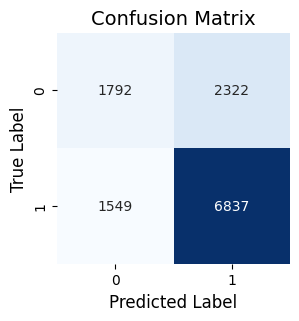

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()
